## Setup enviroment

In [1]:
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import sys
sys.path.append(r'/home/jeanlr/projetos/olist/global')
from util import *
import gc
import json

/home/jeanlr/projetos/olist/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Estabelece a conexão
conn = sqlite3.connect('../data/processed/tb_book_seller.db')

# Consulta SQL em tb_book_seller
query = "SELECT * FROM tb_book_seller" 

df = pd.read_sql_query(query, conn)

# Fechar a conexão
conn.close()

df.head()


,seller_id,PK_DATREF,VL_TOT_PRICE,VL_MED_PRICE,VL_MAX_PRICE,VL_MIN_PRICE,VL_TOT_QTD_PHOTOS,VL_MED_QTD_PHOTOS,VL_MAX_QTD_PHOTOS,VL_MIN_QTD_PHOTOS,...,VL_RAZ_MED_U1M_U3M_CONS_MODA,VL_RAZ_MED_U3M_U6M_CONS_MODA,VL_RAZ_MED_U1M_U3M_CONS_ELETRODOMESTC,VL_RAZ_MED_U3M_U6M_CONS_ELETRODOMESTC,VL_RAZ_MED_U1M_U3M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U3M_U6M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U1M_U3M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U3M_U6M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U1M_U3M_CONS_ALIM_AND_BEBIDAS,VL_RAZ_MED_U3M_U6M_CONS_ALIM_AND_BEBIDAS
0,001cca7ae9ae17fb1caed9dfb1094831,201703,3419.40,122.12,156.58,101.13,82.0,2.93,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,004c9cd9d87a3c30c522c48c4fc07416,201703,4360.18,145.34,284.45,61.66,35.0,1.21,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00ab3eff1b5192e5f1a63bcecfee11c8,201703,110.08,110.08,110.08,110.08,1.0,1.00,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,013900e863eace745d3ec7614cab5b1a,201703,186.32,93.16,93.48,92.84,11.0,5.50,6.0,5.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,01cf7e3d21494c41fb86034f2e714fa1,201703,2710.73,117.86,227.90,75.53,27.0,1.17,3.0,1.0,...,NaN,NaN,0.76,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(15317, 108)

In [4]:
df.info()
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024 ** 2:.2f} MB")
print(f"Max date: {df['PK_DATREF'].max()}")
print(f"Min date: {df['PK_DATREF'].min()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15317 entries, 0 to 15316
Columns: 108 entries, seller_id to VL_RAZ_MED_U3M_U6M_CONS_ALIM_AND_BEBIDAS
dtypes: float64(100), int64(7), object(1)
memory usage: 12.6+ MB
Memory usage: 13.69 MB
Max date: 201808
Min date: 201703


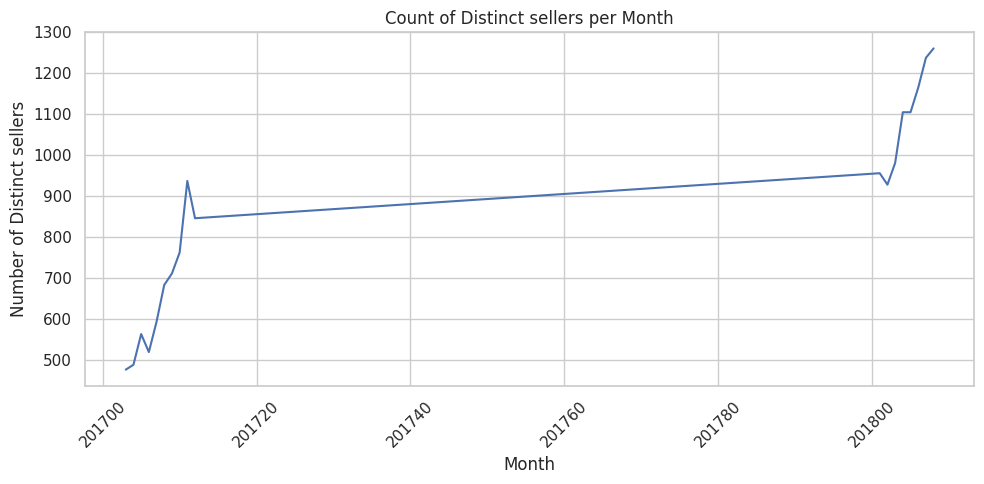

In [5]:
monthly_counts = df.groupby('PK_DATREF')['seller_id'].nunique().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_counts, x='PK_DATREF', y='seller_id')
plt.xlabel('Month')
plt.ylabel('Number of Distinct sellers')
plt.title('Count of Distinct sellers per Month')
plt.xticks(rotation=45)
plt.tight_layout()

In [6]:
df_visual = df.copy()

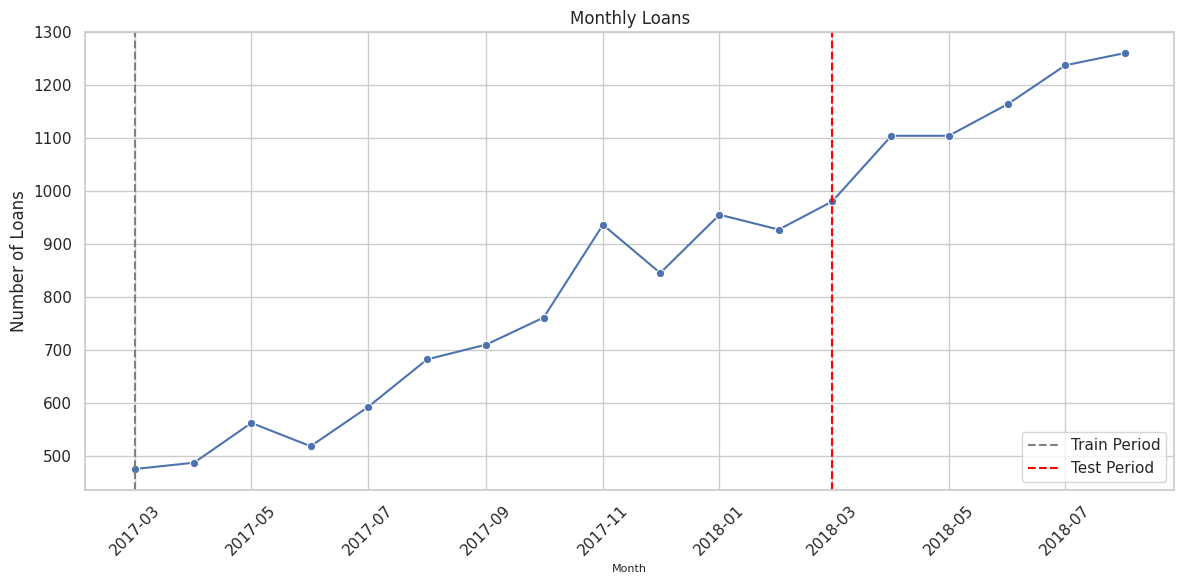

In [7]:
# Converter PK_DATREF para datetime (1� dia do m�s para padronizar)
df_visual['PK_DATREF'] = pd.to_datetime(df_visual['PK_DATREF'].astype(str), format='%Y%m')

# Agrupar os dados
monthly_active_customers = df_visual.groupby('PK_DATREF')['seller_id'].nunique().reset_index()

# Criar o gr�fico
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_active_customers, x='PK_DATREF', y='seller_id', marker='o')

# Adicionar linhas verticais
plt.axvline(pd.to_datetime('2017-03-01'), color='gray', linestyle='--', label='Train Period')
plt.axvline(pd.to_datetime('2018-03-01'), color='red', linestyle='--', label='Test Period')

plt.legend()

# Beautify the plot
plt.title('Monthly Loans', fontsize=12)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [8]:
df_visual.head()

,seller_id,PK_DATREF,VL_TOT_PRICE,VL_MED_PRICE,VL_MAX_PRICE,VL_MIN_PRICE,VL_TOT_QTD_PHOTOS,VL_MED_QTD_PHOTOS,VL_MAX_QTD_PHOTOS,VL_MIN_QTD_PHOTOS,...,VL_RAZ_MED_U1M_U3M_CONS_MODA,VL_RAZ_MED_U3M_U6M_CONS_MODA,VL_RAZ_MED_U1M_U3M_CONS_ELETRODOMESTC,VL_RAZ_MED_U3M_U6M_CONS_ELETRODOMESTC,VL_RAZ_MED_U1M_U3M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U3M_U6M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U1M_U3M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U3M_U6M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U1M_U3M_CONS_ALIM_AND_BEBIDAS,VL_RAZ_MED_U3M_U6M_CONS_ALIM_AND_BEBIDAS
0,001cca7ae9ae17fb1caed9dfb1094831,2017-03-01,3419.40,122.12,156.58,101.13,82.0,2.93,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,004c9cd9d87a3c30c522c48c4fc07416,2017-03-01,4360.18,145.34,284.45,61.66,35.0,1.21,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00ab3eff1b5192e5f1a63bcecfee11c8,2017-03-01,110.08,110.08,110.08,110.08,1.0,1.00,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,013900e863eace745d3ec7614cab5b1a,2017-03-01,186.32,93.16,93.48,92.84,11.0,5.50,6.0,5.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
4,01cf7e3d21494c41fb86034f2e714fa1,2017-03-01,2710.73,117.86,227.90,75.53,27.0,1.17,3.0,1.0,...,NaN,NaN,0.76,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [9]:
#max_dataset_date = '2022-10-01'
#train_df = df[df.date < '2022-10-01']
#max_dataset_date = pd.Da'2022-10-0'
max_inactivity = 60
df_visual['churn'] = 0
df_visual = df_visual.sort_values(['seller_id', 'PK_DATREF'], ascending=True)
df_visual['next_date'] = df_visual.groupby('seller_id')['PK_DATREF'].shift(-1)
df_visual['next_date'].fillna(df_visual.PK_DATREF.max(), inplace=True)
df_visual['days_diff'] = (df_visual['next_date'] - df_visual['PK_DATREF']).dt.days
df_visual.loc[df_visual['days_diff'] >= max_inactivity, 'churn'] = 1

train_df = df_visual.loc[df_visual['PK_DATREF'] < '2018-03-01', :]

/tmp/ipykernel_5269/3844073043.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_visual['next_date'].fillna(df_visual.PK_DATREF.max(), inplace=True)


In [10]:
print('Churn ratio train dataset')
print(train_df.churn.value_counts())
print(train_df.churn.value_counts(normalize=True))

Churn ratio train dataset
churn
0    6473
1    1989
Name: count, dtype: int64
churn
0    0.764949
1    0.235051
Name: proportion, dtype: float64


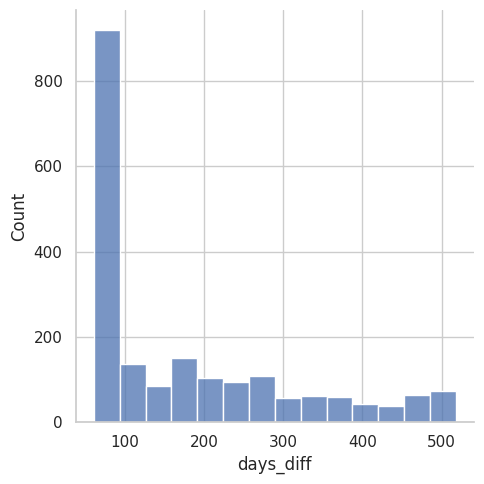

In [11]:
sns.displot(train_df.loc[(train_df.days_diff > 59),'days_diff'], kde=False)

In [12]:
test_df = df_visual.loc[
    (df_visual['PK_DATREF'] >= '2018-03-01') & (df_visual['PK_DATREF'] < '2018-07-01'), :
]

In [13]:
print('Churn ratio test dataset')
print(test_df.churn.value_counts())
print(test_df.churn.value_counts(normalize=True))

Churn ratio test dataset
churn
0    3224
1    1132
Name: count, dtype: int64
churn
0    0.740129
1    0.259871
Name: proportion, dtype: float64


In [14]:
train_df.shape , test_df.shape

((8462, 111), (4356, 111))

In [16]:
non_features_list = ['next_date','days_diff']
df_visual = df_visual.drop(non_features_list, axis=1)
df_visual.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 15317 entries, 3322 to 15316
Columns: 109 entries, seller_id to churn
dtypes: datetime64[ns](1), float64(100), int64(7), object(1)
memory usage: 12.9+ MB


In [17]:
df_visual.rename(columns={"churn": "CHURN"}, inplace=True)

In [18]:
df_visual.head()

,seller_id,PK_DATREF,VL_TOT_PRICE,VL_MED_PRICE,VL_MAX_PRICE,VL_MIN_PRICE,VL_TOT_QTD_PHOTOS,VL_MED_QTD_PHOTOS,VL_MAX_QTD_PHOTOS,VL_MIN_QTD_PHOTOS,...,VL_RAZ_MED_U3M_U6M_CONS_MODA,VL_RAZ_MED_U1M_U3M_CONS_ELETRODOMESTC,VL_RAZ_MED_U3M_U6M_CONS_ELETRODOMESTC,VL_RAZ_MED_U1M_U3M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U3M_U6M_CONS_PETS_AND_BEBES,VL_RAZ_MED_U1M_U3M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U3M_U6M_CONS_PAPEL_AND_CULT,VL_RAZ_MED_U1M_U3M_CONS_ALIM_AND_BEBIDAS,VL_RAZ_MED_U3M_U6M_CONS_ALIM_AND_BEBIDAS,CHURN
3322,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-01,916.02,916.02,916.02,916.02,2.0,2.00,2.0,2.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4033,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-01,2748.06,916.02,916.02,916.02,6.0,2.00,2.0,2.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
0,001cca7ae9ae17fb1caed9dfb1094831,2017-03-01,3419.40,122.12,156.58,101.13,82.0,2.93,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
476,001cca7ae9ae17fb1caed9dfb1094831,2017-04-01,5506.95,128.07,216.09,101.13,124.0,2.88,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
964,001cca7ae9ae17fb1caed9dfb1094831,2017-05-01,9123.92,132.23,216.09,101.13,158.0,2.29,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [19]:
abt = df_visual.copy()

In [21]:
abt.to_parquet('../data/processed/abt_sellers/abt.parquet')
